In [5]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [6]:
# define state
class BMIState(TypedDict):
    weight_kg: float
    heigh_m: float
    bmi : float
    

In [7]:
#calculate bmi function

def calculate_bmi(state: BMIState) -> BMIState: 
    # parameter and returning State
    #accessing state keys
    weight = state['weight_kg']
    height = state['heigh_m']
    #bmi calculation
    bmi = weight/(height**2)
    
    #partial update in state
    state['bmi']=round(bmi,2)
    return state

In [8]:
#Define Graph workflow
graph = StateGraph(BMIState)

#add nodes to workflow: Name of node and function it should call
graph.add_node('Calculate BMI',calculate_bmi)

#add edges to workflow
graph.add_edge(START,'Calculate BMI')
graph.add_edge('Calculate BMI',END)

#compile graph
workflow = graph.compile()

print(workflow)

#execute graph
intial_state = {'weight_kg':80,'heigh_m':1.73}
Final_state = workflow.invoke(intial_state)
print(Final_state)

{'weight_kg': 80, 'heigh_m': 1.73, 'bmi': 26.73}


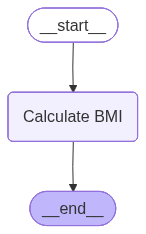

In [9]:
workflow